# DEPLOYMENT

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df_wine = pd.read_csv('white_wine.csv')
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0


## Preprocess

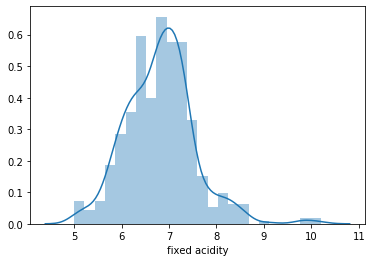

In [4]:
sns.distplot(df_wine['fixed acidity'])

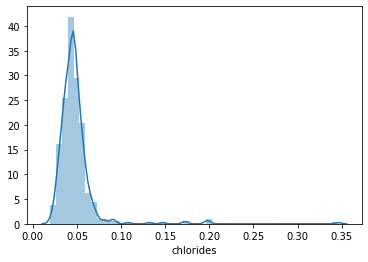

In [5]:
sns.distplot(df_wine['chlorides'])

In [6]:
df_wine['fixed acidity level'] = ['high' if i>8 else 'medium' if i>6.5 else 'low' for i in df_wine['fixed acidity']]

df_wine['fixed acidity level']

0      medium
1         low
2        high
3      medium
4      medium
        ...  
515       low
516    medium
517    medium
518       low
519    medium
Name: fixed acidity level, Length: 520, dtype: object

In [7]:
df_wine['chlorides level'] = ['high' if i>0.07 else 'medium' if i>0.05 else 'low' for i in df_wine['chlorides']]

df_wine['chlorides level']

0         low
1         low
2         low
3      medium
4      medium
        ...  
515    medium
516    medium
517       low
518       low
519       low
Name: chlorides level, Length: 520, dtype: object

In [8]:
df_wine['label'] = [1 if i>6 else 0 for i in df_wine['quality']]

df_wine['label']

0      0
1      0
2      0
3      0
4      0
      ..
515    0
516    0
517    0
518    0
519    0
Name: label, Length: 520, dtype: int64

In [9]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               1
alcohol                 1
quality                 1
fixed acidity level     0
chlorides level         0
label                   0
dtype: int64

In [10]:
df_wine 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,fixed acidity level,chlorides level,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,medium,low,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,low,low,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,high,low,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,medium,medium,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,medium,medium,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0,low,medium,0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0,medium,medium,0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0,medium,low,0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0,low,low,0


In [11]:
df_wine['alcohol'] = df_wine['alcohol'].fillna(df_wine['alcohol'].mean())

In [12]:
df_wine_deploy = df_wine[['alcohol','density','fixed acidity level','chlorides level','label']]

df_wine_deploy

,alcohol,density,fixed acidity level,chlorides level,label
0,8.800000,1.0010,medium,low,0
1,9.500000,0.9940,low,low,0
2,10.100000,0.9951,high,low,0
3,9.900000,0.9956,medium,medium,0
4,9.900000,0.9956,medium,medium,0
...,...,...,...,...,...
515,10.400000,0.9926,low,medium,0
516,9.100000,0.9934,medium,medium,0
517,10.400000,0.9920,medium,low,0
518,10.800000,0.9918,low,low,0


In [13]:
wine_train = df_wine_deploy[:400]
wine_test = df_wine_deploy[400:]

In [14]:
wine_train.to_csv('wine_train.csv', index=False)
wine_test.to_csv('wine_test.csv', index=False)

In [15]:
wine_train = pd.read_csv('wine_train.csv')
wine_train

,alcohol,density,fixed acidity level,chlorides level,label
0,8.8,1.0010,medium,low,0
1,9.5,0.9940,low,low,0
2,10.1,0.9951,high,low,0
3,9.9,0.9956,medium,medium,0
4,9.9,0.9956,medium,medium,0
...,...,...,...,...,...
395,10.0,0.9920,medium,low,0
396,11.4,0.9917,high,low,0
397,11.4,0.9917,low,low,0
398,9.4,0.9993,low,low,0


# Model Training

In [33]:
# Basic Operations
import pandas as pd
import numpy as np

# ML Models
from sklearn.linear_model import LogisticRegression

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer

# Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Model
import pickle
import joblib

# data
wine_train = pd.read_csv('wine_train.csv')
# preprocess
poly = PolynomialFeatures(degree = 3, interaction_only=False,include_bias=False)
one_hot = OneHotEncoder(drop = 'first')

transformer = ColumnTransformer([
                                 ('poly',poly,['alcohol','density']),
                                 ('one_hot',one_hot,['fixed acidity level','chlorides level'])
                                ])
# Data Splitting
X = wine_train.drop(columns = 'label')
y = wine_train['label']

# X_train_val, X_test, y_train_val, y_test = train_test_split(
#     X,
#     y,
#     stratify = y, 
#     random_state = 2020)

# Model Selection
model = LogisticRegression(solver = 'liblinear', random_state = 2020)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)
])

hyperparam_space = {
    'clf__C':[100, 10, 1, 0.1, 0.01, 0.001],
    'clf__solver':['liblinear','newton-cg']
}

skfold = StratifiedKFold(n_splits = 5)

grid_search = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'f1', # metrics
    n_jobs = -1 # use all cores
)
grid_search.fit(X, y)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('poly',
                                                                         PolynomialFeatures(degree=3,
                                                                                            include_bias=False),
                                                                         ['alcohol',
                                                                          'density']),
                                                                        ('one_hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['fixed '
                                                                          'acidity '
                                             

# Prediction Pickle

In [34]:
# Model Pickle
grid_search.best_estimator_.fit(X,y) # final model
filename = 'Model Final.sav'
pickle.dump(grid_search.best_estimator_,open(filename,'wb'))

In [35]:
# Load dataset
wine_test = pd.read_csv('wine_test.csv')

# load model
filename = 'Model Final.sav'
loaded_model = pickle.load(open(filename,'rb'))

## Predict Test Dataset

In [36]:
loaded_model.predict(wine_test.drop(columns='label'))

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [37]:
y_pred = loaded_model.predict(wine_test.drop(columns='label'))
f1_score(wine_test['label'], y_pred)

0.9

In [38]:
loaded_model.predict(wine_test.drop(columns='label')[0:1])

array([0], dtype=int64)

## Predict an Observation

In [39]:
df_predict = pd.DataFrame({
    'alcohol':[10],
    'density':[0.999],
    'fixed acidity level':['high'],
    'chlorides level':['low']
})

print('predict class', loaded_model.predict(df_predict))
print('predict proba', loaded_model.predict_proba(df_predict))


predict class [0]
predict proba [[0.67083563 0.32916437]]


# Prediction Joblib

In [40]:
# saving model 
joblib.dump(grid_search.best_estimator_,'model joblib')

['model joblib']

In [41]:
# loading model
model_joblib = joblib.load('model joblib')

## Predict on Observation

In [42]:
print('predict class', model_joblib.predict(df_predict))
print('predict proba', model_joblib.predict_proba(df_predict))

predict class [0]
predict proba [[0.67083563 0.32916437]]


In [4]:
# !pip install plotly

  Using cached plotly-4.14.3-py2.py3-none-any.whl (13.2 MB)


Dengan menggunakan data Titanic, buatlah interactive plots menggunakan plotly dan flask untuk:

1. countplot antara orang yg alive dan tidak
2. boxplot untuk fare
